In [12]:
# Movie Revenue Analysis: What Drives Box Office Success?

# ## 1. Business Problem
# Studios often face uncertainty when investing in movie projects. This analysis seeks to answer:
# **"What factors drive box office revenue?"**
# Understanding correlations between budget, genre, rating, and revenue can help optimize production decisions.

# ## 2. Data Loading and Initial Exploration
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')


In [13]:
# Load dataset
df = pd.read_csv("movies.csv")

In [14]:
# Preview the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [15]:
# ## 3. Data Cleaning
# Check nulls and data types
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB
None
name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star    

In [16]:
# # Replace NaN in critical numerical columns with mean
# df['budget'].fillna(df['budget'].mean(), inplace=True)
# df['gross'].fillna(df['gross'].mean(), inplace=True)

In [17]:
# Fill or drop other columns as needed
df['company'].fillna('Unknown', inplace=True)

In [19]:
# # Convert data types
# df['budget'] = df['budget'].astype('int64')
# df['gross'] = df['gross'].astype('int64')
# df['year'] = pd.to_datetime(df['released'], errors='coerce').dt.year
# df.dropna(subset=['year'], inplace=True)
# df['year'] = df['year'].astype('int64')

In [20]:
# ## 4. Feature Engineering
# Extract profit and ROI
df['profit'] = df['gross'] - df['budget']
df['roi'] = df['profit'] / df['budget']

In [21]:
# Clean up and categorize ratings
df['rating'].fillna('Unrated', inplace=True)

In [22]:
# ## 5. Exploratory Data Analysis (EDA)
# Basic distributions
df[['gross', 'budget', 'profit']].describe()

,gross,budget,profit
count,7.479000e+03,5.497000e+03,5.436000e+03
mean,7.850054e+07,3.558988e+07,6.706582e+07
std,1.657251e+08,4.145730e+07,1.588181e+08
min,3.090000e+02,3.000000e+03,-1.580311e+08
25%,4.532056e+06,1.000000e+07,-3.177509e+06
50%,2.020576e+07,2.050000e+07,1.376612e+07
75%,7.601669e+07,4.500000e+07,7.017584e+07
max,2.847246e+09,3.560000e+08,2.610246e+09


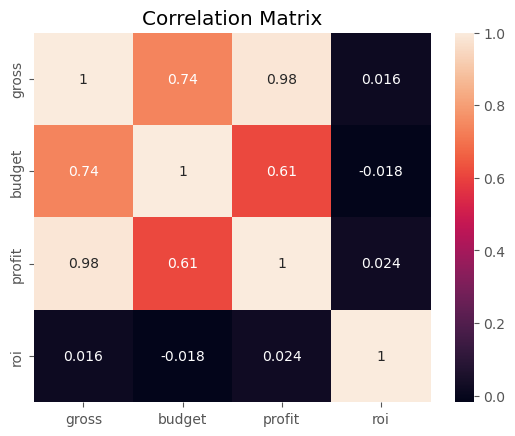

In [23]:
# Correlation matrix
correlation_matrix = df[['gross', 'budget', 'profit', 'roi']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

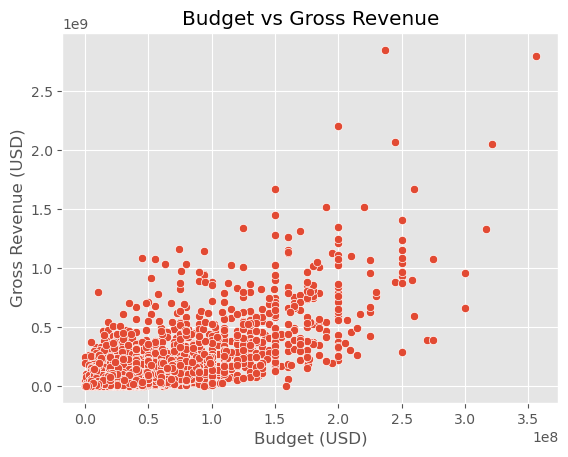

In [24]:
# ## 6. Visual Analysis

# Gross vs Budget
sns.scatterplot(x='budget', y='gross', data=df)
plt.title("Budget vs Gross Revenue")
plt.xlabel("Budget (USD)")
plt.ylabel("Gross Revenue (USD)")
plt.show()

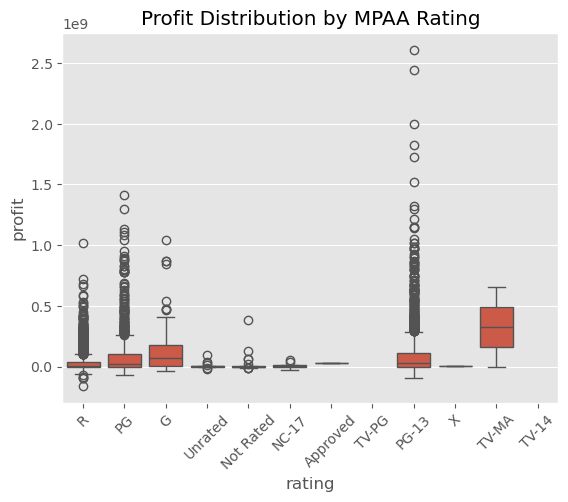

In [25]:
# Profit by Rating
sns.boxplot(x='rating', y='profit', data=df)
plt.title("Profit Distribution by MPAA Rating")
plt.xticks(rotation=45)
plt.show()

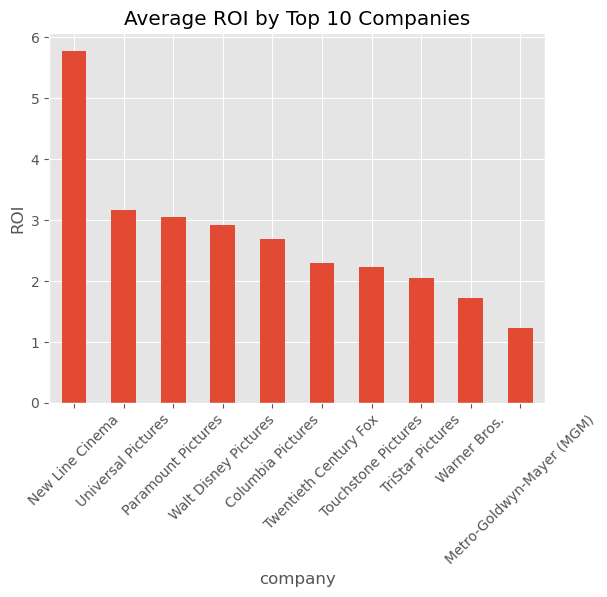

In [26]:
# Average ROI by Company
top_companies = df['company'].value_counts().head(10).index
roi_by_company = df[df['company'].isin(top_companies)].groupby('company')['roi'].mean().sort_values(ascending=False)
roi_by_company.plot(kind='bar', title='Average ROI by Top 10 Companies')
plt.ylabel("ROI")
plt.xticks(rotation=45)
plt.show()

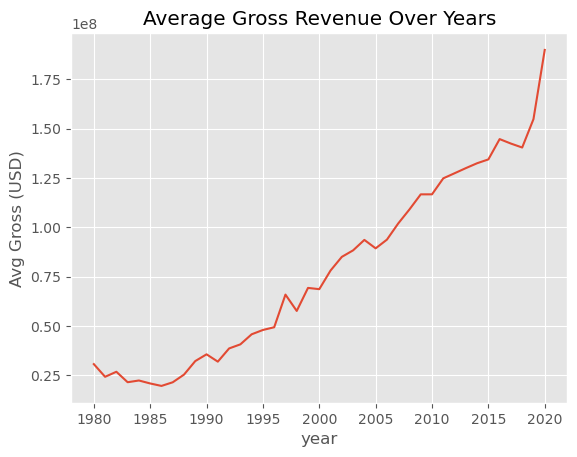

In [27]:
# ## 7. Time Trend
avg_revenue_by_year = df.groupby('year')['gross'].mean()
avg_revenue_by_year.plot(title='Average Gross Revenue Over Years')
plt.ylabel("Avg Gross (USD)")
plt.show()

In [28]:
# ## 8. Business Insights & Recommendations

# Based on the analysis, we propose the following:
# - **Higher budgets generally lead to higher revenue**, but not always to higher ROI.
# - **Movies rated PG-13 and R yield the most consistent profits**.
# - **Studios should monitor ROI, not just gross revenue**, especially when allocating large budgets.
# - **Average gross revenue has fluctuated over years**, suggesting potential cyclical or economic influences.

# This analysis helps decision-makers in studios prioritize investments and understand the tradeoffs between budget, rating, and financial return.
